# Modelo 2021-09-28_Lab_Madrid_CopaBor_FondoBlanco_Xception_100ep

Problema de clasificación con 6 clases.

Modelo: Xception con image_size = 528, batch_size=16, 100 épocas. Tarda unos 52 s por época.

528 imágenes en total: 369 train + 53 val + 106 test que se han distribuido de forma homogénea de manera que el dataset esté equilibrado (ya que había la mitad de imágenes de clase  <= 50 mL con respecto al resto de clases).

Mean RGB pixel: [145.7009020327461, 145.57541800835594, 143.40409009710942]
Standard deviation of RGB pixel: [37.09825214810984, 38.16266727994038, 37.706027031863435]

In [1]:
import os
import json
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.models import load_model

from imgclas.data_utils import load_image, load_data_splits, load_class_names
from imgclas.test_utils import predict
from imgclas import paths, plot_utils, utils

# User parameters to set
TIMESTAMP = '2021-09-28_Lab_Madrid_CopaBor_FondoBlanco_Xception_100ep'                       # timestamp of the model
MODEL_NAME = 'final_model.h5'                           # model to use to make the prediction
TOP_K = 2                                               # number of top classes predictions to save

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load the data
class_names = load_class_names(splits_dir=paths.get_ts_splits_dir())

# Load training configuration
conf_path = os.path.join(paths.get_conf_dir(), 'conf.json')
with open(conf_path) as f:
    conf = json.load(f)
    
# Load the model
model = load_model(os.path.join(paths.get_checkpoints_dir(), MODEL_NAME), custom_objects=utils.get_custom_objects(), compile=False)

W0929 07:06:45.172953 140341366814528 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0929 07:06:45.175280 140341366814528 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0929 07:06:45.176966 140341366814528 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

Loading class names...


## Predicciones

### Test Laboratorio/Madrid/copa Bor/Fondo blanco

In [2]:
cd ..

/srv/image-classification-tf


In [3]:
SPLIT_NAME = 'test'                                         # data split to use (nombre del .txt que vas a leer, en este caso test)
# conf['general']['images_directory'] = '/media/ignacio/Datos/datasets/semillas/datasets/RJB'  # custom the absolute path to the images directory, if needed

# Load the data
X, y = load_data_splits(splits_dir=paths.get_ts_splits_dir(),
                        im_dir=conf['general']['images_directory'],
                        split_name=SPLIT_NAME)

# Predict
pred_lab, pred_prob = predict(model, X, conf, top_K=TOP_K, filemode='local')

# Save the predictions
pred_dict = {'filenames': list(X),
             'pred_lab': pred_lab.tolist(),
             'pred_prob': pred_prob.tolist()}
if y is not None:
    pred_dict['true_lab'] = y.tolist()

pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}+top{}.json'.format(MODEL_NAME, SPLIT_NAME, TOP_K))
with open(pred_path, 'w') as outfile:
    json.dump(pred_dict, outfile, sort_keys=True)

Loading test data...
106/106 [==============================] - 151s 1s/step


In [4]:
from imgclas import test_utils
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


true_lab, pred_lab = np.array(pred_dict['true_lab']), np.array(pred_dict['pred_lab'])

top1 = test_utils.topK_accuracy(true_lab, pred_lab, K=1)
# top5 = test_utils.topK_accuracy(true_lab, pred_lab, K=5)

print('Top1 accuracy: {:.1f} %'.format(top1 * 100))
# print('Top5 accuracy: {:.1f} %'.format(top5 * 100))

labels = range(len(class_names))
print('\n')
print('Micro recall: {:.1f} %'.format(100 * recall_score(true_lab, pred_lab[:, 0], labels=labels, average='micro')))
print('Macro recall: {:.1f} %'.format(100 * recall_score(true_lab, pred_lab[:, 0], labels=labels, average='macro')))
print('Macro recall (no labels): {:.1f} %'.format(100 * recall_score(true_lab, pred_lab[:, 0], average='macro')))
print('Weighted recall: {:.1f} %'.format(100 * recall_score(true_lab, pred_lab[:, 0], labels=labels, average='weighted')))

print('\n')
print('Micro precision: {:.1f} %'.format(100 * precision_score(true_lab, pred_lab[:, 0], labels=labels, average='micro')))
print('Macro precision: {:.1f} %'.format(100 * precision_score(true_lab, pred_lab[:, 0], labels=labels, average='macro')))
print('Macro precision (no labels): {:.1f} %'.format(100 * precision_score(true_lab, pred_lab[:, 0], average='macro')))
print('Weighted precision: {:.1f} %'.format(100 * precision_score(true_lab, pred_lab[:, 0], labels=labels, average='weighted')))

print('\n')
print('Micro F1 score: {:.1f} %'.format(100 * f1_score(true_lab, pred_lab[:, 0], labels=labels, average='micro')))
print('Macro F1 score: {:.1f} %'.format(100 * f1_score(true_lab, pred_lab[:, 0], labels=labels, average='macro')))
print('Macro F1 score (no labels): {:.1f} %'.format(100 * f1_score(true_lab, pred_lab[:, 0], average='macro')))
print('Weighted F1 score: {:.1f} %'.format(100 * f1_score(true_lab, pred_lab[:, 0], labels=labels, average='weighted')))

Top1 accuracy: 95.3 %


Micro recall: 95.3 %
Macro recall: 95.7 %
Macro recall (no labels): 95.7 %
Weighted recall: 95.3 %


Micro precision: 95.3 %
Macro precision: 95.7 %
Macro precision (no labels): 95.7 %
Weighted precision: 95.4 %


Micro F1 score: 95.3 %
Macro F1 score: 95.7 %
Macro F1 score (no labels): 95.7 %
Weighted F1 score: 95.3 %


Confusion matrix


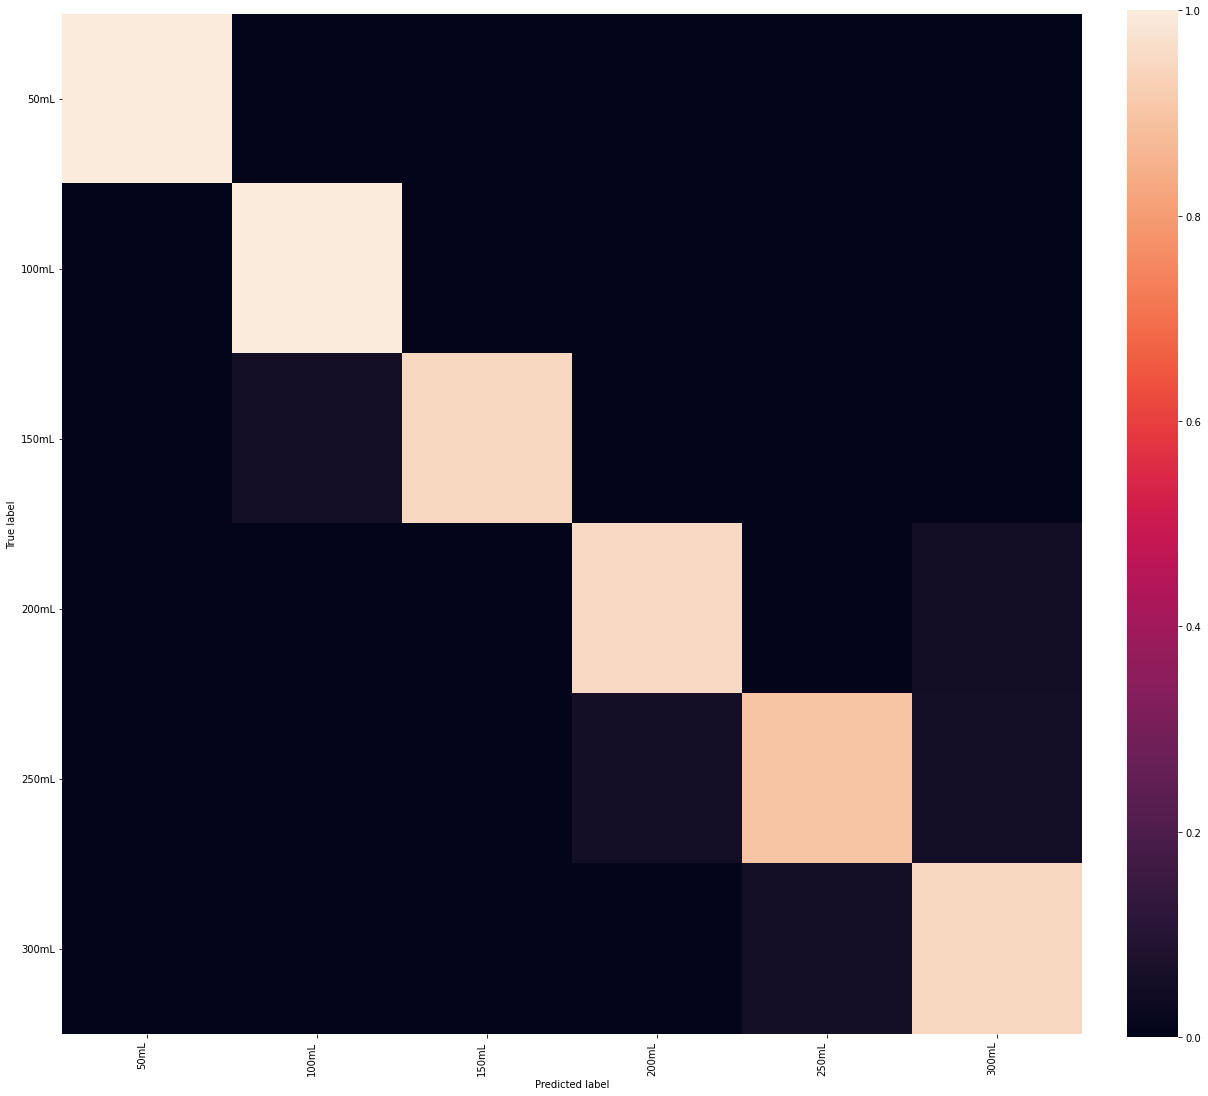

In [7]:
print("Confusion matrix")
import matplotlib.pylab as plt
import seaborn
from sklearn.metrics import confusion_matrix


def plt_conf_matrix(conf_mat, labels=False):
    
    fig = plt.figure(figsize=(20, 20))
    hm = seaborn.heatmap(conf_mat, annot=False, square=True, cbar_kws={'fraction':0.046, 'pad':0.04},
                         xticklabels=labels, yticklabels=labels)
    fontsize = None
    hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=fontsize)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
y_true, y_pred = np.array(pred_dict['true_lab']), np.array(pred_dict['pred_lab'])[:, 0]
conf_mat = confusion_matrix(y_true, y_pred, labels=range(len(class_names)), sample_weight=None)
normed_conf = conf_mat / np.sum(conf_mat, axis=1)[:, np.newaxis]

# plt_conf_matrix(conf_mat)
plt_conf_matrix(normed_conf, labels=class_names)